# **Predicting Real Estate Prices in Bengaluru Using Machine Learning: An Analysis of Key Factors and Model Development**

### **Problem Statement**

The real estate market in Bengaluru is diverse and dynamic, influenced by various factors such as location, property type, and amenities. Prospective homebuyers face challenges in estimating the fair market value of properties due to the complexity of these factors and market volatility. Accurate price prediction is crucial for informed decision-making, benefiting not only buyers and sellers but also real estate agents and financial institutions involved in property investments.

The dataset provided includes nine key features, including categorical variables like `area_type`, `availability`, `location`, and `society`, numerical variables such as `total_sqft`, `bath`, and `balcony`, and mixed-format variables like `size`. The target variable is `price`, which represents the property value. The challenge is to leverage this data to build a machine learning model that can predict property prices accurately, considering the interplay of these diverse factors.

## **Data Exploration and Preprocessing**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

 import warnings
 warnings.filterwarnings('ignore')


In [2]:
url = 'https://raw.githubusercontent.com/GlorieChris/Predicting-Real-Estate-Prices-in-Bengaluru-Using-Machine-Learning/refs/heads/main/bengaluru_house_prices.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5600,Super built-up Area,Ready To Move,Gottigere,2 BHK,MBireap,1410,2.0,2.0,45.00
6009,Super built-up Area,Ready To Move,Arekere,2 BHK,Chiteny,900,2.0,3.0,50.00
4475,Super built-up Area,Ready To Move,Haralur Road,2 BHK,Ozensve,1000,2.0,1.0,78.00
8904,Super built-up Area,Ready To Move,Ambalipura,3 BHK,Maorai,1625,2.0,2.0,145.00
9679,Super built-up Area,Ready To Move,Ananth Nagar,3 BHK,Patri M,1319,3.0,1.0,37.75


### **Data Understanding**

In [5]:
df.shape

(13320, 9)

In [6]:
# drop unnecessary columns
df.drop(columns=['area_type', 'availability', 'society'], inplace=True)

In [7]:
# Check for Missing Data
df.isnull().sum().sort_values(ascending=False)

balcony       609
bath           73
size           16
location        1
total_sqft      0
price           0
dtype: int64

In [8]:
# Data Types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


**Handling missing data**

In [10]:
missing_percentage = df.isnull().mean() * 100
missing_percentage.sort_values(ascending=False)

balcony       4.572072
bath          0.548048
size          0.120120
location      0.007508
total_sqft    0.000000
price         0.000000
dtype: float64

In [11]:
# Identify columns with missing percentage ≤ 5%
columns_to_drop = missing_percentage[missing_percentage <= 5].index

# drop missing rows less than 5%
df = df.dropna(subset=columns_to_drop)

In [12]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

# **Feature Transformation**

In [13]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [14]:
# Convert 'size' into 'bedrooms'
df['bedrooms'] = df['size'].apply(lambda x: int(x[0]))

In [15]:

# df.drop(columns=['size'], inplace=True)

In [16]:
df.head(3)

,location,size,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3


In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df[~df['total_sqft'].apply(is_float)].sample(5)

,location,size,total_sqft,bath,balcony,price,bedrooms
7607,Bommenahalli,3 Bedroom,15Acres,3.0,1.0,217.000,3
10351,Jalahalli,1 BHK,610 - 615,1.0,0.0,27.565,1
8312,Tumkur Road,1 BHK,596 - 861,1.0,0.0,31.315,1
3890,Tumkur Road,3 BHK,1210 - 1477,3.0,0.0,57.760,3
8236,Budigere,1 BHK,664 - 722,1.0,0.0,27.375,1


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [19]:
df.head()

,location,size,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [20]:
import re

In [21]:
# Conversion factors
SQ_METERS_TO_SQFT = 10.7639
SQ_YARDS_TO_SQFT = 9
ACRE_TO_SQFT = 43560
GROUND_TO_SQFT = 240
GUNTHA_TO_SQFT = 1089
CENTS_TO_SQFT = 435.6  # 1 Cent = 435.6 sqft

# Function to handle mixed formats for total_sqft
def convert_to_sqft(value):
    if isinstance(value, str):
        # Clean up the value by ensuring space between number and unit
        value = value.replace(" ", "")  # Remove spaces

        # Handle ranges like '660 - 780'
        if '-' in value:
            low, high = value.split('-')
            return (float(low) + float(high)) / 2

        # Handle square meters (e.g., '34.46Sq. Meter')
        elif 'sqmeter' in value or 'sqmeters' in value:
            value = value.replace('Sq. Meter', ' sqmeters').replace('Sqmeter', ' sqmeters')
            return float(value.split(' ')[0]) * SQ_METERS_TO_SQFT

        # Handle square yards (e.g., '1574Sq. Yards')
        elif 'sqyards' in value:
            value = value.replace('Sq. Yards', ' sqyards').replace('Sqyards', ' sqyards')
            return float(value.split(' ')[0]) * SQ_YARDS_TO_SQFT

        # Handle Acres (e.g., '30Acres')
        elif 'acre' in value.lower():
            value = value.replace('Acre', ' Acre').replace('acre', ' Acre')
            return float(value.split(' ')[0]) * ACRE_TO_SQFT

        # Handle Grounds (e.g., '1Grounds')
        elif 'ground' in value.lower():
            value = value.replace('Ground', ' Ground').replace('ground', ' Ground')
            return float(value.split(' ')[0]) * GROUND_TO_SQFT

        # Handle Guntha (e.g., '24Guntha')
        elif 'guntha' in value.lower():
            value = value.replace('Guntha', ' Guntha').replace('guntha', ' Guntha')
            return float(value.split(' ')[0]) * GUNTHA_TO_SQFT

        # Handle Cents (e.g., '1500Cents')
        elif 'cent' in value.lower():
            value = value.replace('Cents', ' Cent').replace('cent', ' Cent')
            return float(value.split(' ')[0]) * CENTS_TO_SQFT

    # If no unit, treat as a standard sqft value
    return float(re.findall(r"\d+\.?\d*", value)[0])

# Example usage:
df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)


- We handled mixed formats and non-standard units in the total_sqft column to ensure consistency and accuracy in our analysis. Property size data can be provided in various formats, including ranges (e.g., "1200-1500 sqft"), different units (such as square meters, square yards, acres), and some corner cases with incorrect or inconsistent data. By converting all the values to a common unit (square feet) and taking the average of ranges, we standardized the data for easier and more meaningful analysis. Dropping rows with unrecognized or unconvertible formats ensures that our model uses only valid data.
- Additionally, we created a new feature, price_per_sqft, to allow for a more detailed understanding of property pricing based on its size, which is a crucial metric for real estate price predictions.

In [22]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bedrooms      0
dtype: int64

In [23]:
# Drop rows where 'total_sqft' is NaN (corner cases)
# df = df.dropna(subset=['total_sqft'])

In [24]:
# Add the 'price_per_sqft' feature
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']


In [25]:
df.head()

,location,size,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [26]:
df.dtypes

location           object
size               object
total_sqft        float64
bath              float64
balcony           float64
price             float64
bedrooms            int64
price_per_sqft    float64
dtype: object

In [27]:
df.shape

(12710, 8)

**bin location**

In [28]:
# Calculate frequency of each location
location_counts = df['location'].value_counts()

In [29]:
location_counts

location
Whitefield            514
Sarjapur  Road        372
Electronic City       300
Kanakpura Road        261
Thanisandra           231
                     ... 
Milk Colony             1
Sundara Nagar           1
Jaladarsini Layout      1
Madanayakahalli         1
Abshot Layout           1
Name: count, Length: 1265, dtype: int64

In [30]:
# Define a threshold for rare locations
threshold = 10

# Create a mapping
location_mapping = {loc: loc if count >= threshold else 'Other'
                    for loc, count in location_counts.items()}

# Apply the mapping to bin locations
df['location'] = df['location'].map(location_mapping)


### **Outlier Detection**

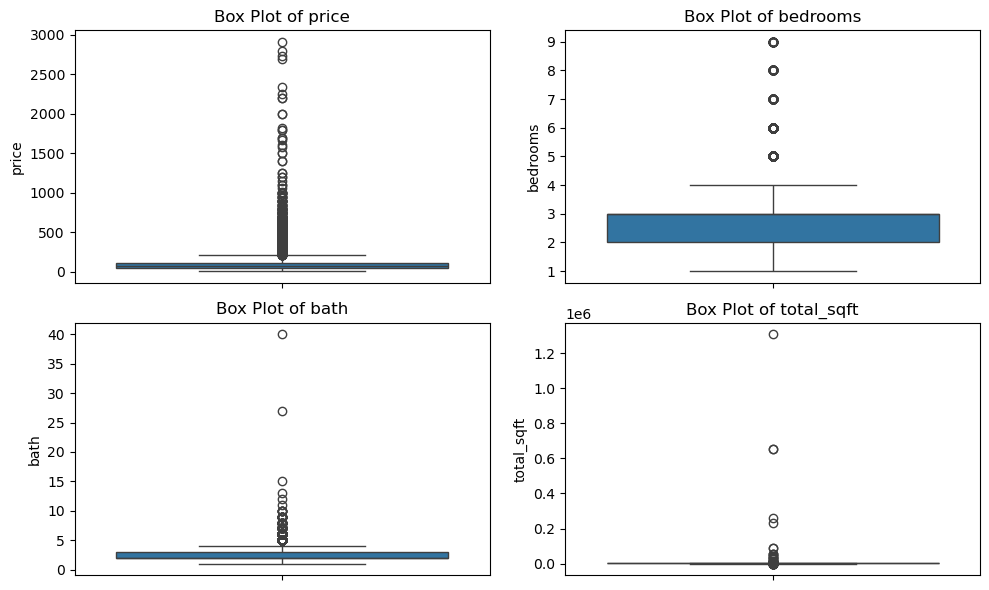

In [31]:
# Box plots for each feature
features = ['price', 'bedrooms', 'bath', 'total_sqft']
plt.figure(figsize=(10,6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

Dropping the outliers based on the number of bathrooms

In [32]:
# Remove rows where the number of bathroom exceed 10
df = df[df['bath'] <= 10]

In [33]:
df.head()

,location,size,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


**Distribution of the target variable**

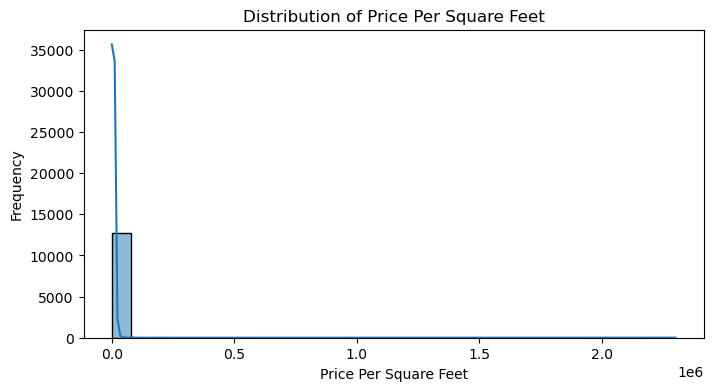

In [34]:
# plot the distribution of the target column
plt.figure(figsize=(8, 4))

sns.histplot(df['price_per_sqft'], bins=30, kde=True)
plt.title('Distribution of Price Per Square Feet')
plt.xlabel('Price Per Square Feet')
plt.ylabel('Frequency')

plt.show()

In [35]:
# transform the target column
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])
#df['sqrt_price_per_sqft'] = np.sqrt(df['price_per_sqft'])

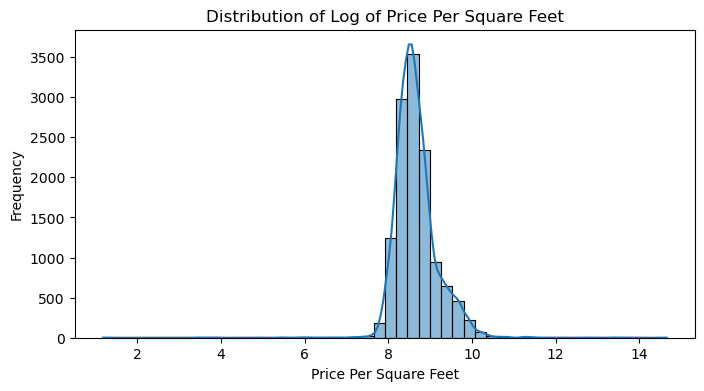

In [36]:
# plot the distribution of the target column
plt.figure(figsize=(8, 4))

sns.histplot(df['log_price_per_sqft'], bins=50, kde=True)
plt.title('Distribution of Log of Price Per Square Feet')
plt.xlabel('Price Per Square Feet')
plt.ylabel('Frequency')

plt.show()

In [37]:
# Filter DataFrame to keep only rows with Log_Price between 6 and 12
df= df[(df['log_price_per_sqft'] >= 7) & (df['log_price_per_sqft'] <= 11)]

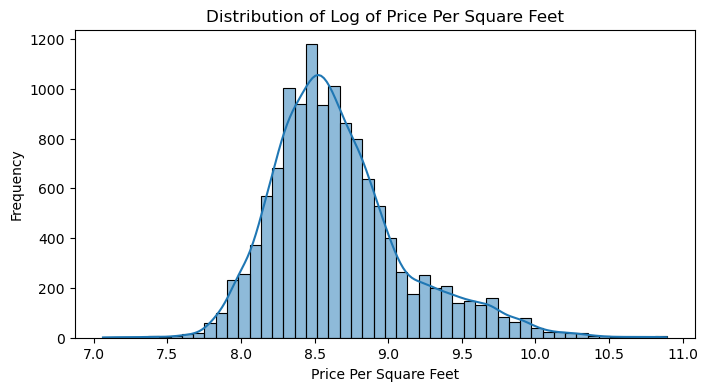

In [38]:
# plot the distribution of the target column
plt.figure(figsize=(8, 4))

sns.histplot(df['log_price_per_sqft'], bins=50, kde=True)
plt.title('Distribution of Log of Price Per Square Feet')
plt.xlabel('Price Per Square Feet')
plt.ylabel('Frequency')

plt.show()

### **Correlation Matrix**

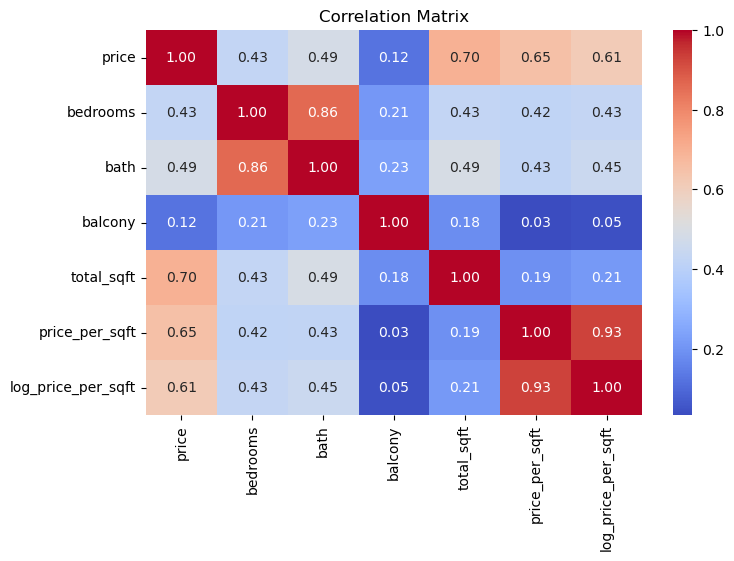

In [39]:
columns = ['price', 'bedrooms', 'bath', 'balcony', 'total_sqft', 'price_per_sqft', 'log_price_per_sqft']

corr_matrix = df[columns].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## **Data Scaling and Encoding**

In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False, drop='first')

In [41]:
# scaling numerical features
num_cols = ['bedrooms', 'bath', 'balcony', 'total_sqft', 'price_per_sqft', 'log_price_per_sqft']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [42]:
df.head()

,location,size,total_sqft,bath,balcony,price,bedrooms,price_per_sqft,log_price_per_sqft
0,Electronic City Phase II,2 BHK,-0.467575,-0.531718,-0.718043,39.07,-0.655741,-0.696980,-0.970079
1,Chikka Tirupathi,4 Bedroom,1.165714,2.090845,1.733038,120.00,1.157316,-0.473464,-0.491094
2,Uttarahalli,3 BHK,-0.061369,-0.531718,1.733038,62.00,0.250788,-0.549102,-0.641627
3,Lingadheeranahalli,3 BHK,0.024316,0.342470,-0.718043,95.00,0.250788,-0.075414,0.164292
4,Kothanur,2 BHK,-0.315248,-0.531718,-0.718043,51.00,-0.655741,-0.562665,-0.669760


In [43]:
df_num = df.drop(columns=['location', 'size'])
df_num.head()

,total_sqft,bath,balcony,price,bedrooms,price_per_sqft,log_price_per_sqft
0,-0.467575,-0.531718,-0.718043,39.07,-0.655741,-0.696980,-0.970079
1,1.165714,2.090845,1.733038,120.00,1.157316,-0.473464,-0.491094
2,-0.061369,-0.531718,1.733038,62.00,0.250788,-0.549102,-0.641627
3,0.024316,0.342470,-0.718043,95.00,0.250788,-0.075414,0.164292
4,-0.315248,-0.531718,-0.718043,51.00,-0.655741,-0.562665,-0.669760


In [44]:
df_num.isna().sum().sort_values(ascending=False)

total_sqft            0
bath                  0
balcony               0
price                 0
bedrooms              0
price_per_sqft        0
log_price_per_sqft    0
dtype: int64

# **Model Building**

**Data Splitting**

In [45]:
# Features and target variable

X = df_num.drop(columns=['price_per_sqft','log_price_per_sqft']) # features
y = df_num['log_price_per_sqft'] # target variable

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Splitting into training and testing sets (80 : 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (10132, 5)
Testing set size: (2534, 5)


**Model Selection Training**

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
# train the model
lr_model = LinearRegression()

In [51]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [52]:
# predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression:")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}")

Linear Regression:
RMSE: 0.45
R2 Score: 0.56


In [53]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Regressor:")
print(f"RMSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}")


Random Forest Regressor:
RMSE: 0.01
R2 Score: 0.99


In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
gdb = GradientBoostingRegressor(random_state=42)
gdb.fit(X_train, y_train)

# Predict and evaluate
y_pred_gdb = gdb.predict(X_test)
print("\nGradient Boosting Regressor:")
print(f"RMSE: {mean_squared_error(y_test, y_pred_gdb):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_gdb):.2f}")


Gradient Boosting Regressor:
RMSE: 0.01
R2 Score: 0.99


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# cross validatio for each model
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_gdb = cross_val_score(gdb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# print
print("Linear Regression:")
print(f"RMSE: {np.sqrt(-cv_scores_lr).mean():.2f}")

print("\nRandom Forest Regressor:")
print(f"RMSE: {np.sqrt(-cv_scores_rf).mean():.2f}")

print("\nGradient Boosting Regressor:")
print(f"RMSE: {np.sqrt(-cv_scores_gdb).mean():.2f}")

Linear Regression:
RMSE: 0.69

Random Forest Regressor:
RMSE: 0.07

Gradient Boosting Regressor:
RMSE: 0.11


**Residual Plot:**

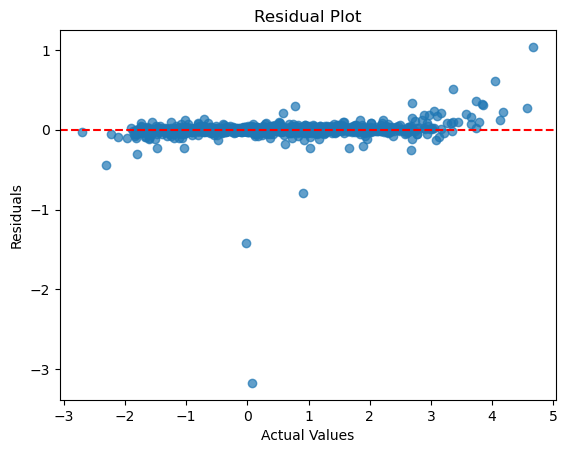

In [56]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_rf
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


**Predicted vs. Actual Values Plot:**


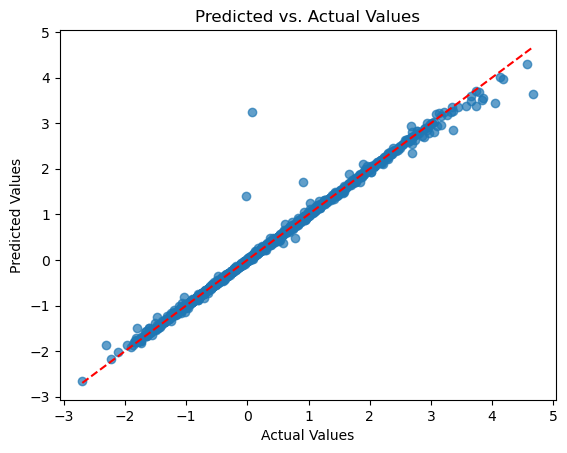

In [57]:
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()


**Learning Curve:**

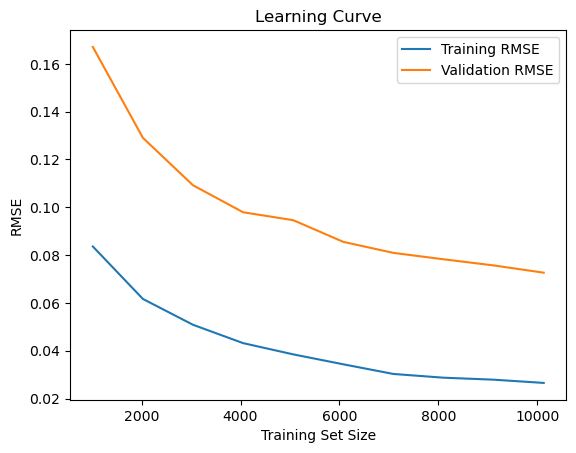

In [58]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

plt.plot(train_sizes, train_rmse, label='Training RMSE')
plt.plot(train_sizes, test_rmse, label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [59]:
import numpy as np

# Select a random row from X_test
sample_row = X_test.iloc[0].values.reshape(1, -1)  # Change the index as needed

# Predict the log price per square foot
log_predicted_value = rf.predict(sample_row)

# Transform back to the actual value (exponentiation of the log)
predicted_price_per_sqft = np.exp(log_predicted_value)

# Display the result
print(f"Predicted Log Price Per Sqft: {log_predicted_value[0]:.2f}")
print(f"Predicted Actual Price Per Sqft: {predicted_price_per_sqft[0]:.2f}")


Predicted Log Price Per Sqft: -0.89
Predicted Actual Price Per Sqft: 0.41


In [60]:
y_test.iloc[0]

-0.8900119837654197

In [61]:
import numpy as np

# Select a random row from the test set
random_index = X_test.index[5]  # Adjust index to pick a different row
sample_row = X_test.loc[random_index].values.reshape(1, -1)

# Predict the log price per square foot
log_predicted_value = rf.predict(sample_row)

# Transform back to the actual value
predicted_price_per_sqft = np.exp(log_predicted_value)

# Retrieve the actual value for comparison
actual_log_price_per_sqft = y_test.loc[random_index]
actual_price_per_sqft = np.exp(actual_log_price_per_sqft)

# Display the results
print(f"Sample Row Index: {random_index}")
print(f"Predicted Log Price Per Sqft: {log_predicted_value[0]:.2f}")
print(f"Predicted Actual Price Per Sqft: {predicted_price_per_sqft[0]:.2f}")
print(f"Actual Log Price Per Sqft: {actual_log_price_per_sqft:.2f}")
print(f"Actual Price Per Sqft: {actual_price_per_sqft:.2f}")


Sample Row Index: 4653
Predicted Log Price Per Sqft: -1.78
Predicted Actual Price Per Sqft: 0.17
Actual Log Price Per Sqft: -1.78
Actual Price Per Sqft: 0.17
